In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [24]:


# === Setup ===
DATA_DIR = "data"
datasets = ["FD001", "FD002", "FD003", "FD004"]

columns = [
    "unit number",
    "time, in cycles",
    "operational setting 1",
    "operational setting 2",
    "operational setting 3",
    *(f"sensor measurement {i}" for i in range(1, 22)),
]

# === Load all datasets into dictionary ===
train_sets = {}
for ds in datasets:
    path = os.path.join(DATA_DIR, f"train_{ds}.txt")
    train_sets[ds] = pd.read_csv(path, sep="\s+", header=None, names=columns)


train_sets["FD004"].head()

unit number  time, in cycles  operational setting 1  operational setting 2  \
0            1                1                42.0049                 0.8400   
1            1                2                20.0020                 0.7002   
2            1                3                42.0038                 0.8409   
3            1                4                42.0000                 0.8400   
4            1                5                25.0063                 0.6207   

   operational setting 3  sensor measurement 1  sensor measurement 2  \
0                  100.0                445.00                549.68   
1                  100.0                491.19                606.07   
2                  100.0                445.00                548.95   
3                  100.0                445.00                548.70   
4                   60.0                462.54                536.10   

   sensor measurement 3  sensor measurement 4  sensor measurement 5  ...  \
0               1343.43               1112.93                  3.91  ...   
1               1477.61               1237.50                  9.35  ...   
2               1343.12               1117.05                  3.91  ...   
3               1341.24               1118.03                  3.91  ...   
4               1255.23               1033.59                  7.05  ...   

   sensor measurement 12  sensor measurement 13  sensor measurement 14  \
0                 129.78                2387.99                8074.83   
1                 312.59                2387.73                8046.13   
2                 129.62                2387.97                8066.62   
3                 129.80                2388.02                8076.05   
4                 164.11                2028.08                7865.80   

   sensor measurement 15  sensor measurement 16  sensor measurement 17  \
0                 9.3335                   0.02                    330   
1                 9.1913                   0.02                    361   
2                 9.4007                   0.02                    329   
3                 9.3369                   0.02                    328   
4                10.8366                   0.02                    305   

   sensor measurement 18  sensor measurement 19  sensor measurement 20  \
0                   2212                 100.00                  10.62   
1                   2324                 100.00                  24.37   
2                   2212                 100.00                  10.48   
3                   2212                 100.00                  10.54   
4                   1915                  84.93                  14.03   

   sensor measurement 21  
0                 6.3670  
1                14.6552  
2                 6.4213  
3                 6.4176  
4                 8.6754  

[5 rows x 26 columns]

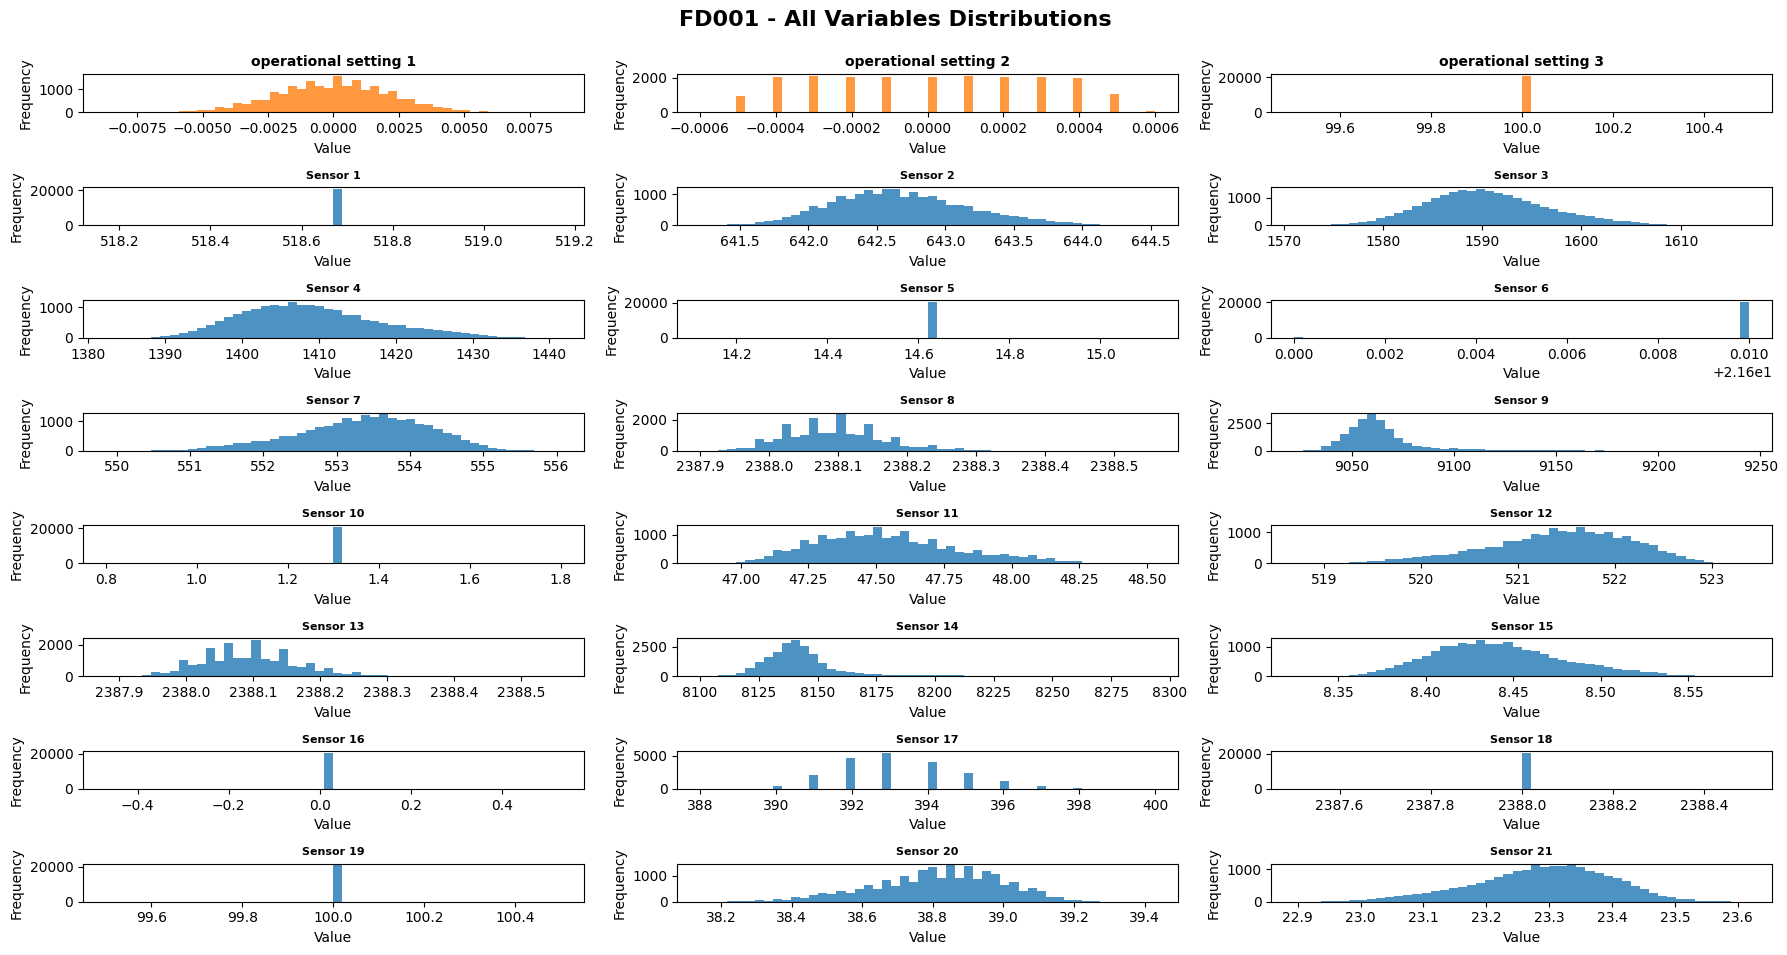

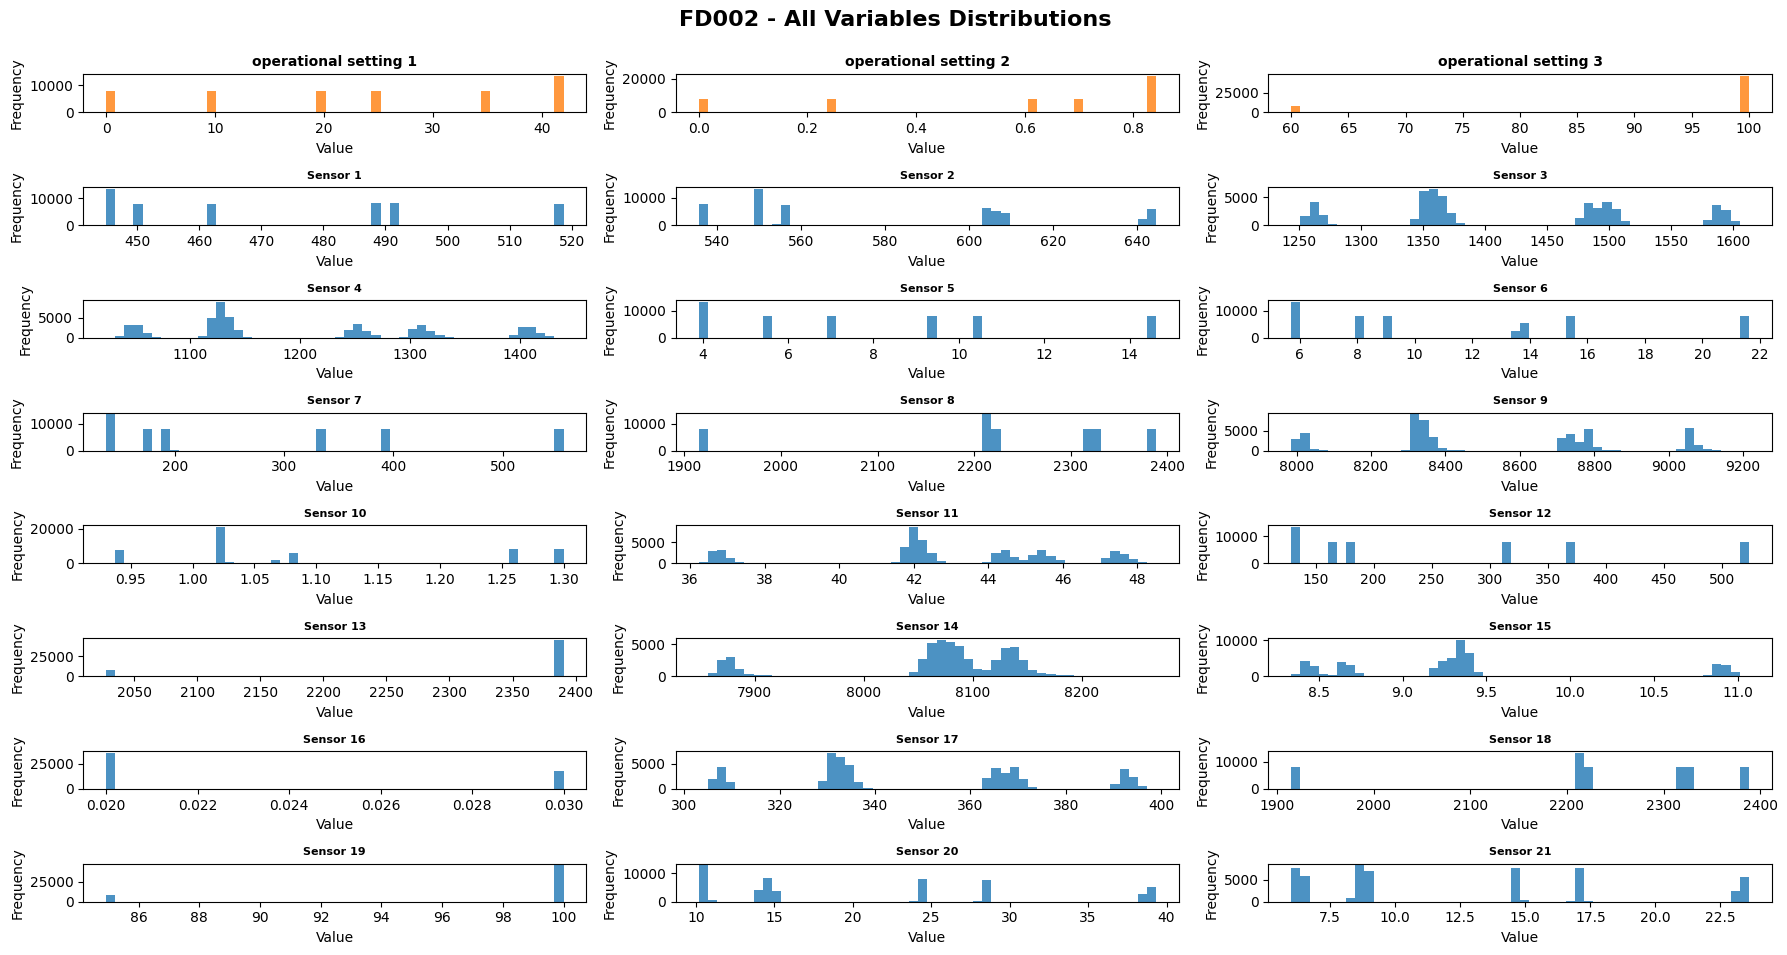

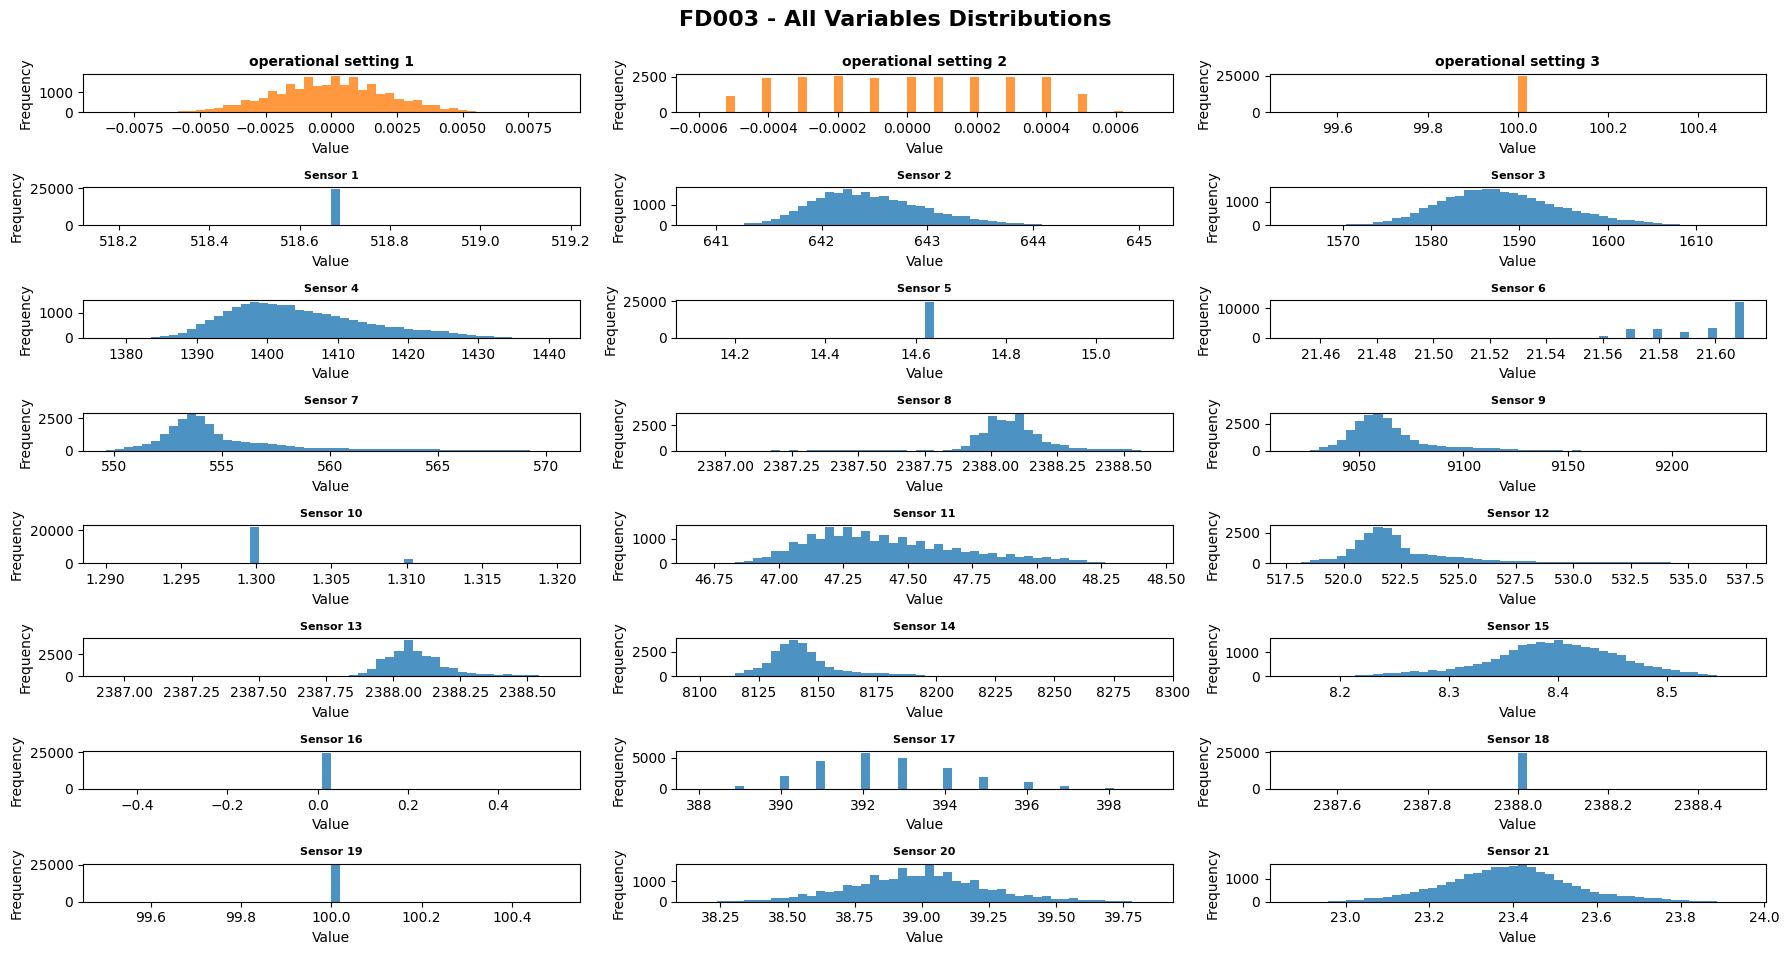

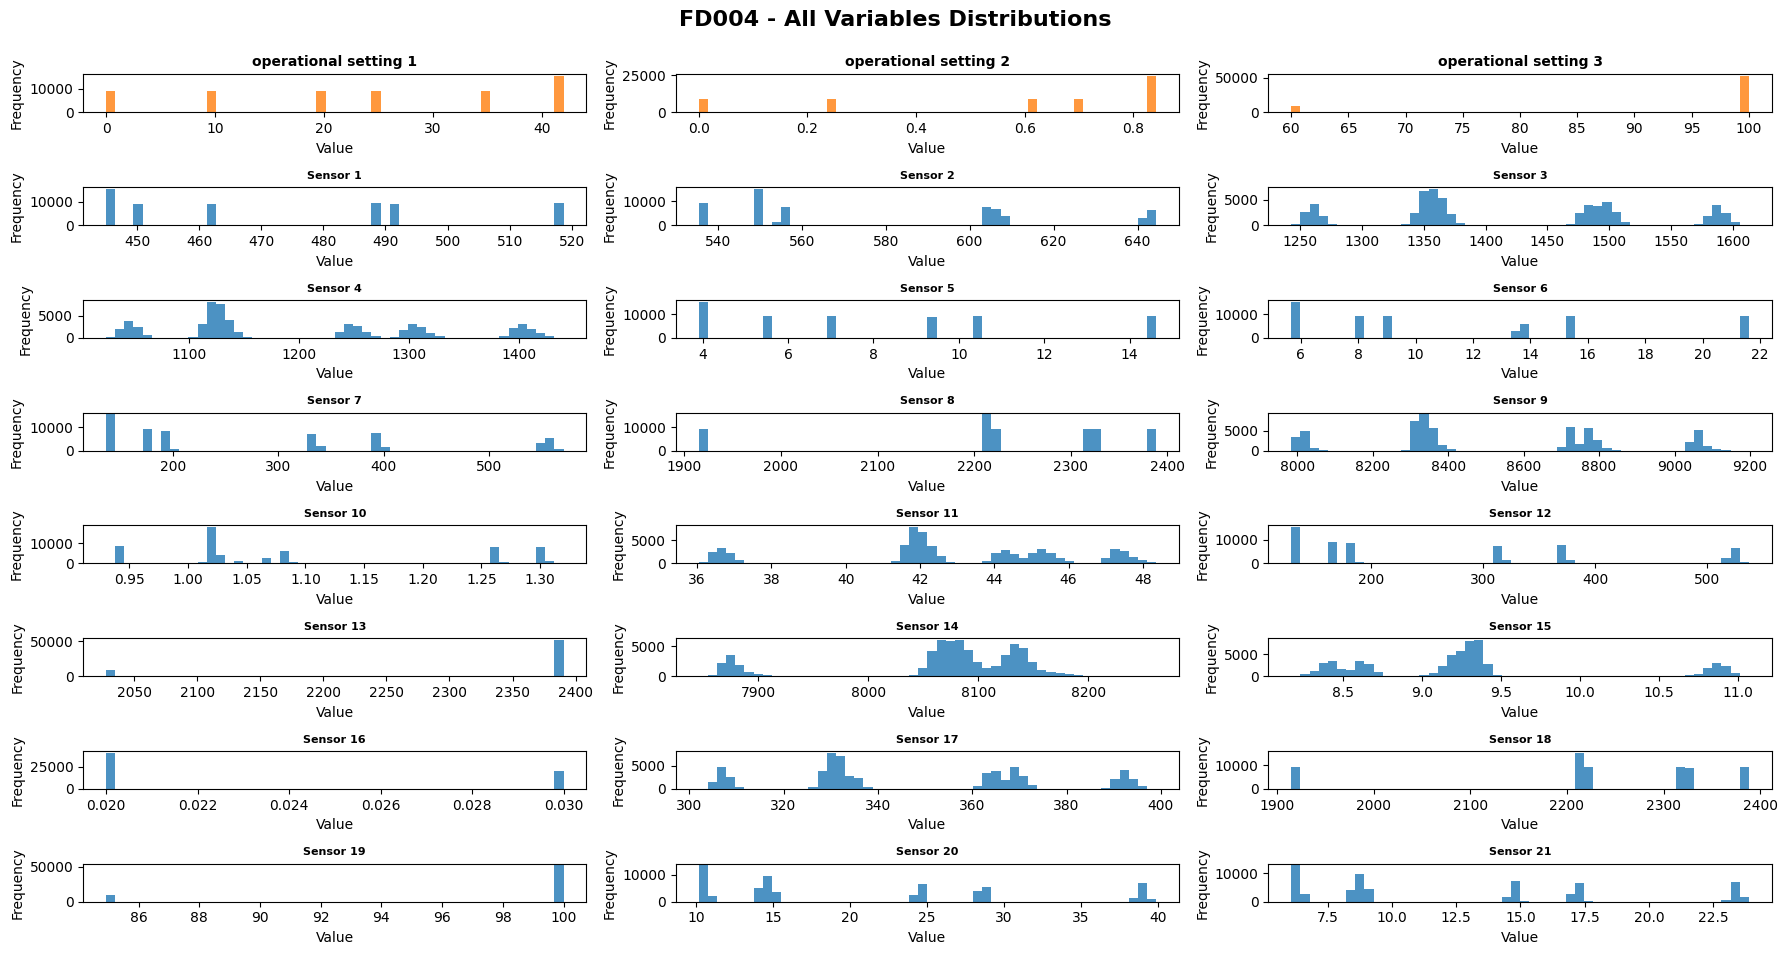

In [52]:
import matplotlib.pyplot as plt

def plot_all_variables(df, title):
    """
    Plot all operational settings and sensor measurements in a single figure.
    Operational settings on top, sensors in a grid below.
    """
    op_cols = [c for c in df.columns if c.startswith("operational setting")]
    sensor_cols = [c for c in df.columns if c.startswith("sensor measurement")]

    # === Combined figure ===
    n_op = len(op_cols)
    n_sensors = len(sensor_cols)
    total_rows = 1 + ((n_sensors + 2) // 3)  # 1 row for ops, rest for sensors
    fig, axes = plt.subplots(total_rows, 3, figsize=(18, 10))
    axes = axes.flatten()

    # --- Operational settings ---
    for i, col in enumerate(op_cols):
        axes[i].hist(df[col].dropna(), bins=50, color="#ff7f0e", alpha=0.8)
        axes[i].set_title(col, fontsize=10, fontweight="bold")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    # --- Sensor measurements ---
    for i, col in enumerate(sensor_cols):
        ax = axes[n_op + i]
        ax.hist(df[col].dropna(), bins=50, color="#1f77b4", alpha=0.8)
        ax.set_title(col.replace("sensor measurement ", "Sensor "), fontsize=8, fontweight="bold")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

    # Hide unused axes
    for j in range(n_op + n_sensors, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(f"{title} - All Variables Distributions", fontsize=16, fontweight="bold")
    plt.show()


# === Example usage for all training datasets ===
for ds, df in train_sets.items():
    plot_all_variables(df, ds)


In [ ]:
for ds, df in train_sets.items():
    is_time_series = (
        df.groupby("unit number")["time, in cycles"]
        .apply(lambda x: x.is_monotonic_increasing)
        .all()
    )
    print(f"{ds}: {'Time series' if is_time_series else 'Not time series'}")


FD001: Time series
FD002: Time series
FD003: Time series
FD004: Time series
